<h3>Задание 2. Бифуркационный анализ системы ОДУ

**Модель №2**  

Заданная вариантом модель описывается следующей нелинейной системой ОДУ:  
  
<div style="text-align: center">

$\begin{cases}
{dx \over dt} = k_1z - k_{-1}x - k_2z^2x, 
\\
{dy \over dt} = k_3z^2 - k_{-3}y,
\end{cases}$  

</div>
  
где $z = 1 - x - 2y$.


Система рассматривается на фазовом пространстве S:  
<div style="text-align: center">  

$S = \left\{0 \le x \le 1, 0 \le y \le 0.5, 0 \le x + 2y \le 1 \right\}$  
</div> 


In [1]:
from sympy import symbols, Symbol, solve, Eq, lambdify, dsolve, Function
import numpy as np
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Определение символьных переменных
x, y, z = symbols('x y z')
k1 = Symbol("k1")
k1m = Symbol("k1m")
k2 = Symbol("k2")
k3 = Symbol("k3")
k3m = Symbol("k3m")

# Определение символьных выражений
z = 1 - x - 2*y
f1 = k1 * z  - k1m * x - k2 * z**2 * x
f2 = k3 * z**2 - k3m * y

<h4>Постановка задачи однопараметрического анализа

1. Используя аналитические методы продолжения по параметру, построить зависимость  
стационарных решений $x_c$ и $y_c$ от параметра $k_1$ ($k_2$) для нескольких значений  
параметра $k_{-1}$: {0.001, 0.005, 0.01, 0.015, 0.02}  
2. Используя аналитические методы продолжения по параметру, построить зависимость  
стационарных решений $x_c$ и $y_c$ от параметра $k_1$ ($k_2$) для нескольких значений  
параметра $k_{-3}$: {0.0005, 0.001, 0.002, 0.003, 0.004}
3. Исследуя след и определитель матрицы Якоби на стационаре, найти точки  
бифуркаций, уточнить их и отметить на графиках.

**1. Анализ поведения стационарного решения $x_c(k_1)$ и $y_c(k_1)$ в зависимости от параметра $k_1$ при различных $k_{-1}$.**   

Стационарное решение $x_c(k_1)$ и $y_c(k_1)$ определяется как решение нелинейной системы  
<div style="text-align: center">  

$\begin{cases}
k_1z - k_{-1}x - k_2z^2x = 0, 
\\
k_3z^2 - k_{-3}y = 0.
\end{cases}$  
</div>  

Иногда прямую зависимость $x_c(k_1)$ и $y_c(k_1)$ найти не удается, тогда используется алгоритм продолжения решения по параметру.
 


Символьное решение стационарной системы

In [2]:
# Создание и решение однородной системы уравнений
system = [Eq(f1, 0), Eq(f2, 0)]
solutions = solve(system, (x, k1)) 

Ниже приведены две пары решений системы $x(y)$ и $k_1(y)$

In [3]:
solutions[0][0]

-2*y + 1 - sqrt(k3**3*k3m*y)/k3**2

In [4]:
solutions[0][1]

-(k1m*k3 + k2*k3m*y)/k3 - sqrt(k3**3*k3m*y)*(2*y - 1)*(k1m*k3 + k2*k3m*y)/(k3**2*k3m*y)

In [5]:
solutions[1][0]

-2*y + 1 + sqrt(k3**3*k3m*y)/k3**2

In [6]:
solutions[1][1]

-(k1m*k3 + k2*k3m*y)/k3 + sqrt(k3**3*k3m*y)*(2*y - 1)*(k1m*k3 + k2*k3m*y)/(k3**2*k3m*y)

In [7]:
x_sol0 = solutions[0][0]
k1_sol0 = solutions[0][1]
x_sol1 = solutions[1][0]
k1_sol1 = solutions[1][1]

x_func0 = lambdify((y, k3, k3m), x_sol0)
x_func1 = lambdify((y, k3, k3m), x_sol1)
k1_func0 = lambdify((y, k1m, k2, k3, k3m), k1_sol0)
k1_func1 = lambdify((y, k1m, k2, k3, k3m), k1_sol1)


В данном случае удалось построить решение $x(y)$ и $k_1(y)$, следовательно применяется алгоритм продолжения по параметру.  
Считая $y$ независимой переменной, по набору $\left\{y_k: 0 < y_0 \le y_1 \le ... \le y_N = 0.5 \right\}$ определим значения параметра $k_1(y_k)$  
и переменной $x(y_k)$.
 

In [8]:
# Зависимость стационарных решений от k1
k1m_vals = [0.001, 0.005, 0.01, 0.015, 0.02] 
k2val = 2.5
k3m_val = 0.001
k3val = 0.0032

y_k = np.linspace(0.001, 0.5, 10000) #y=0 не решение(в знаменателе 0)


Ниже приведены графики $x_c(k_1)$ и $y_c(k_1)$ - зависимостей стационарного решения исходной системы от параметра $k_1$,  
при различных значениях параметра $k_{-1}$. Учтено, что решение рассматривается на фазовой плоскости $S$.  
Интерес представляет первая пара стационарных решений - на ней присутствуют точки бифуркации.

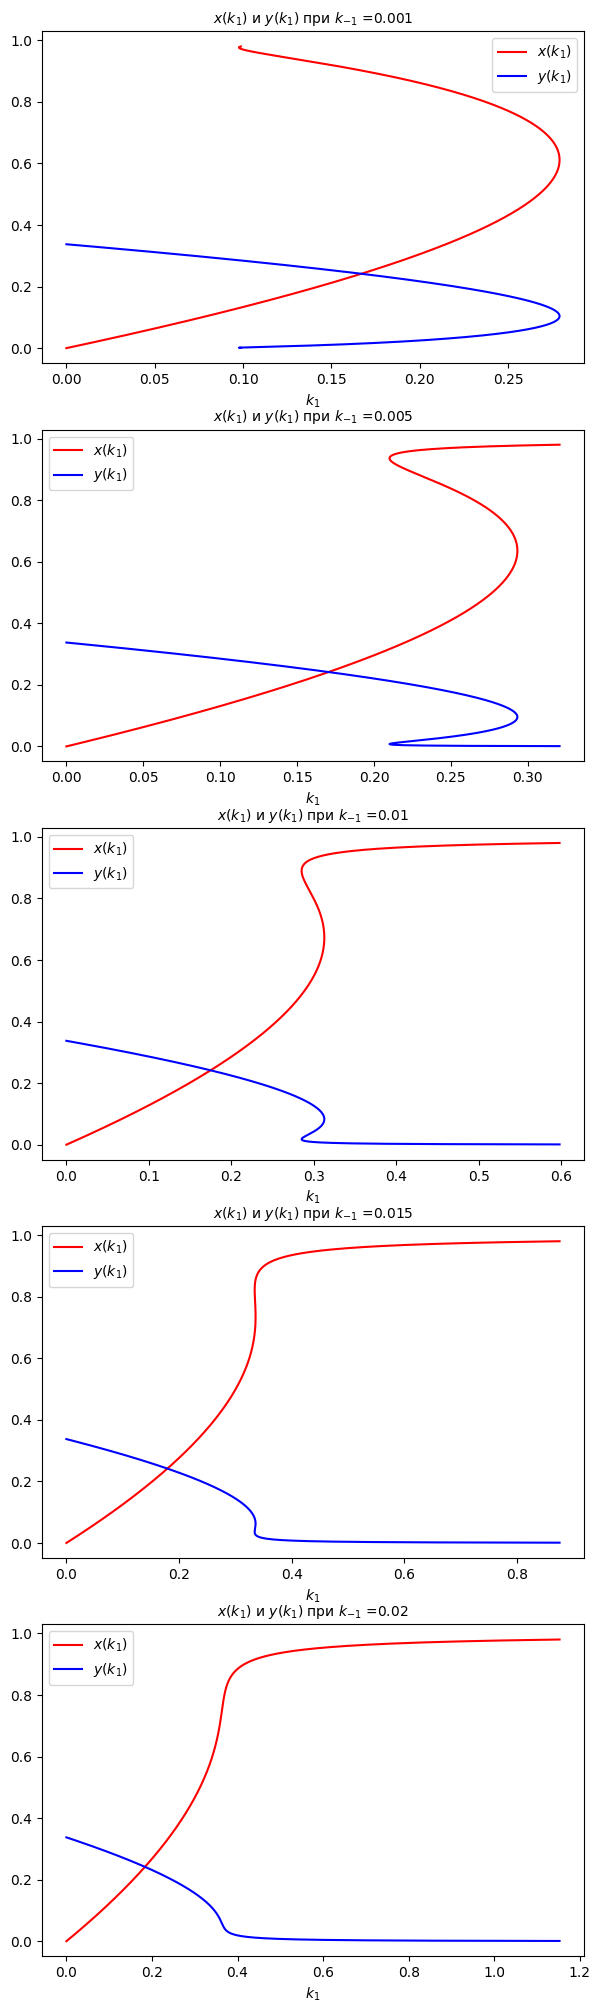

In [9]:
# Построение графиков
plt.figure(figsize=(7, 25))
plt.rc('axes', titlesize= 10)

for i in range(len(k1m_vals)):
    x_val = x_func0(y_k, k3val, k3m_val)
    k1_val = k1_func0(y_k, k1m_vals[i], k2val, k3val, k3m_val)

    x_val, y_permis, k1_val = zip(*[(x, y, z) for x, y, z in zip(x_val, y_k, k1_val) if 0 <= x <= 1])
    
    # Построение графиков x0, y1
    plt.subplot(5, 1, i + 1)
    plt.plot(k1_val, x_val, color = 'red', label='$x(k_1)$')
    plt.plot(k1_val, y_permis, color = 'blue', label='$y(k_1)$')
    plt.title('$x(k_1)$ и $y(k_1)$ при $k_{-1}$ =' + str(k1m_vals[i]))
    plt.xlabel('$k_1$')
    plt.legend(['$x(k_1)$', '$y(k_1)$'])

plt.show()

**2. Анализ поведения стационарного решения $x_c(k_1)$ и $y_c(k_1)$ в зависимости от параметра при различных $k_{-3}$**   

Проведем аналогичные вычисления зависимостей $x_c(k_1)$ и $y_c(k_1)$ - стационарного решения от параметра $k_1$,  
при различных значениях параметра $k_{-3}$: {0.0005, 0.001, 0.002, 0.003, 0.004}. Ниже приведены соответсвующие графики. 

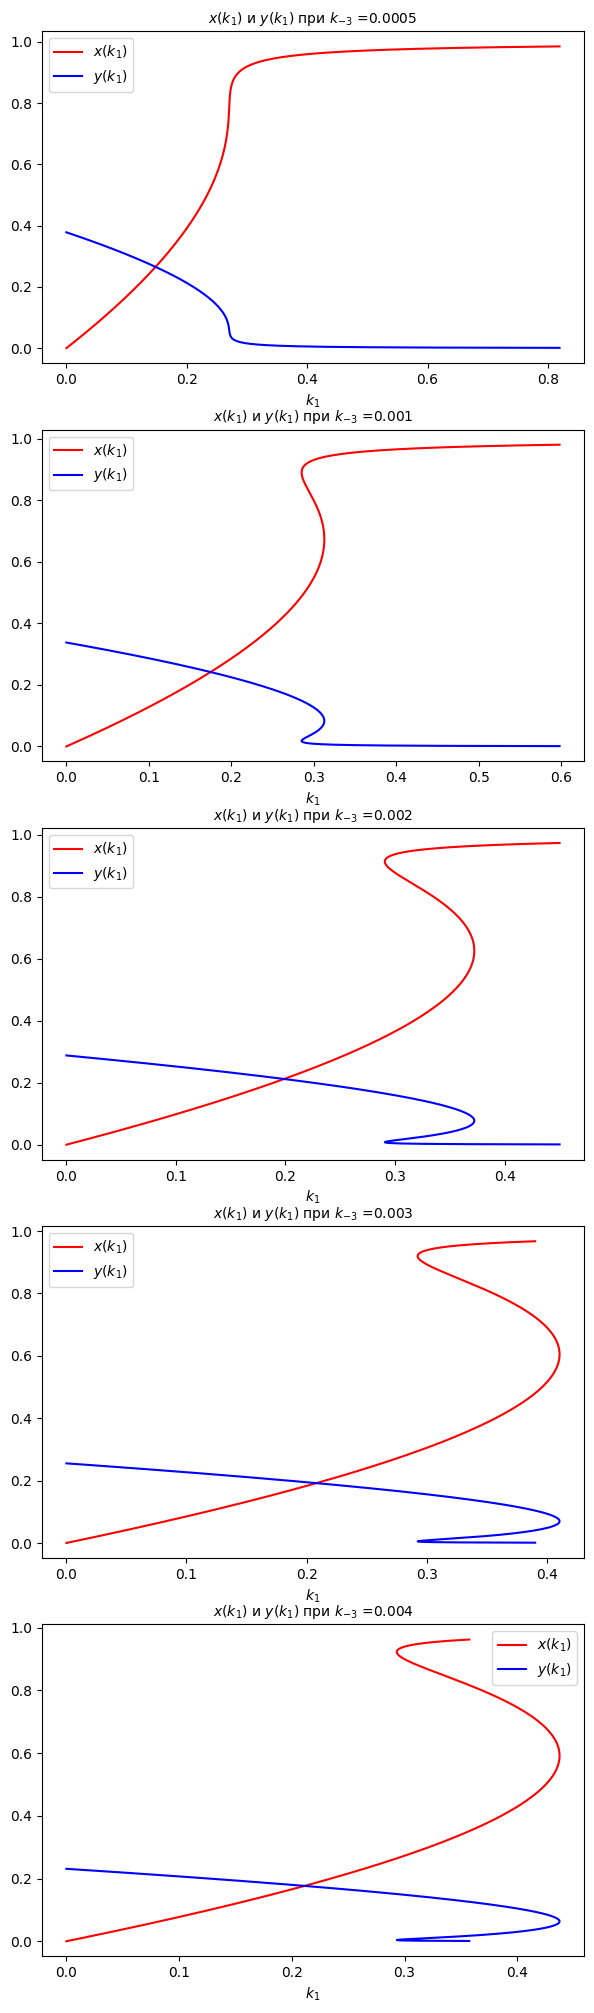

In [10]:
# Зависимость стационарных решений от k1
k1m_val = 0.01 
k2val = 2.5
k3m_vals = [0.0005, 0.001, 0.002, 0.003, 0.004]
k3val = 0.0032

# Построение графиков
plt.figure(figsize=(7, 25))
plt.rc('axes', titlesize= 10)

for i in range(len(k3m_vals)):
    x_val = x_func0(y_k, k3val, k3m_vals[i])
    k1_val = k1_func0(y_k, k1m_val, k2val, k3val, k3m_vals[i])

    x_val, y_permis, k1_val = zip(*[(x, y, z) for x, y, z in zip(x_val, y_k, k1_val) if 0 <= x <= 1])
    
    # Построение графиков x0, y0
    plt.subplot(5, 1, i + 1)
    plt.plot(k1_val, x_val, color = 'red', label='$x(k_1)$')
    plt.plot(k1_val, y_permis, color = 'blue', label='$y(k_1)$')
    plt.title('$x(k_1)$ и $y(k_1)$ при $k_{-3}$ =' + str(k3m_vals[i]))
    plt.xlabel('$k_1$')
    plt.legend(['$x(k_1)$', '$y(k_1)$'])

plt.show()


**3. Нахождение точек бифуркации и их уточнение.**   

Определим, при каких значениях параметра $k_1$ происходит бифуркация одного из стационарных решений $x(k_1)$, $y(k_1)$.  
Для этого необходимо проанализировать собственные значения матрицы Якоби на стационаре при каждом значении параметра. 

In [11]:
from sympy import Matrix
import sympy

F = Matrix([f1, f2])
A = F.jacobian([x, y])
detA = A.det()
traceA = A.trace()

# Функция определителя
detA_func = lambdify((x, y, k1, k1m, k2, k3, k3m), detA)
# Функция следа матрицы
traceA_func = lambdify((x, y, k1, k1m, k2, k3, k3m), traceA)

**Критерии наличия точки бифуркации**

Бифуркация происходит вблизи **устойчивого стационарного состояния**: все собственные значения имеют отрицательные действительные части.  
  
Обозначим $f(y)$ - маркировочная функция - определитель или след матрицы Якоби. Здесь $y$ - независимая переменная, через которую удалось выразить все остальные неизвестные исходной системы и исследуемый параметр $k_1$: $x(y)$ и $k_1(y)$. На очередном шаге независимой переменной $y$ у "маркировочной" функции проиходит изменение знака:
<div style="text-align: center">

$f(y_i) * f(y_{i + 1}) < 0$  

</div>

В качестве приближенной точки бифуркации будем брать то значение исследуемого параметра, которому соответствует линейное приближение $f(y)$ в точке смены знака:  

<div style="text-align: center">

$f(y) = f(y_i) + \frac{f_{i+1} - f_i}{y_{i+1} - y_i} * (y - y_i)$  

</div>

Приравняв это выражение к нулю, можно легко определить значение независимой переменной на критическом параметре и, далее, сам параметр.

**Определение типа точек бифуркации**

Если при данном критическом значении параметра $k_1$ одно из собственных значений матрицы Якоби обращается в ноль, то в такой точке происходит  
*седло-узловая бифуркация*. При этом определитель матрицы Якоби на стационаре будет равен нулю.  

*Сверхкритическая бифуркация Андронова-Хопфа* - положение, при прохождении которого стационарная точка типа устойчивого фокуса становится
неустойчивым фокусом, а вокруг нее рождается предельный цикл малого размера. Критерий, по которому можно определить наличие такого типа бифуркации в случае, когда матрица Якоби имеет размер $(2,2)$ - равенство нулю следа этой матрицы: $a_{11} + a_{22} = 0$. При этом необходимо потребовать, чтобы определитель был отрицателен.

*Замечание.* Поскольку бифуркационные значения $k_1$ ищутся численно, будем добавлять в список критических значений только те, которые отоличаются от всех уже имеющихся не меньше, чем на шаг сетки.

In [12]:
# Определение k1, при которых есть бифуркация и ее тип
# 1 - седло, 2 - Хопф
def get_bif_type(x, y, k1_vals, k1m_val, k2val, k3val, k3m_val):
    k1_bif, y_bif, x_bif, markers = [], [], [], []

    #Определитель и след
    detA_vals = [detA_func(x[i], y[i], k1_vals[i], k1m_val, k2val, k3val, k3m_val) for i in range(len(x))]
    trace_vals = [traceA_func(x[i], y[i], k1_vals[i], k1m_val, k2val, k3val, k3m_val) for i in range(len(x))]

    for i in range(len(y) - 1):
        # Анализ определителя матрицы
        if (detA_vals[i] * detA_vals[i + 1] < 0 or detA_vals[i] == 0):
            # Линейное приближение точки бифуркации
            tmp_y = y[i] - detA_vals[i] * (y[i + 1] - y[i]) / (detA_vals[i + 1] - detA_vals[i])
            k1_tmp = k1_func0(tmp_y, k1m_val, k2val, k3val, k3m_val)
            # Добавляем новый k1, если нет очень близкого
            if all(abs(k1_tmp - el) >= pow(10, -4) for el in k1_bif):
                x_tmp = x_func0(tmp_y, k3val, k3m_val)
                y_bif.append(tmp_y)
                x_bif.append(x_tmp)
                k1_bif.append(k1_tmp)
                markers.append(1)

        # Анализ следа матрицы
        if (trace_vals[i] * trace_vals[i + 1] < 0 or (trace_vals[i] == 0 and detA_vals[i] < 0)):
            # Линейное приближение точки бифуркации
            tmp_y = y[i] - trace_vals[i] * (y[i + 1] - y[i]) / (trace_vals[i + 1] - trace_vals[i])
            k1_tmp = k1_func0(tmp_y, k1m_val, k2val, k3val, k3m_val)
            # Добавляем новый k1, если нет очень близкого
            if all(abs(k1_tmp - el) >= pow(10, -4) for el in k1_bif):
                x_tmp = x_func0(tmp_y, k3val, k3m_val)
                y_bif.append(tmp_y)
                x_bif.append(x_tmp)
                k1_bif.append(k1_tmp)
                markers.append(2)

    return k1_bif, y_bif, x_bif, markers

Ниже приведены графики зависимости стационарного решения $x(k_1), y(k_1)$ от параметра на фазовой плоскости $S$ для различных значений параметра $k_{-3}$.  
На графиках отмечены найденные численно точки бифуркации, отмечен найденный тип таких точек.

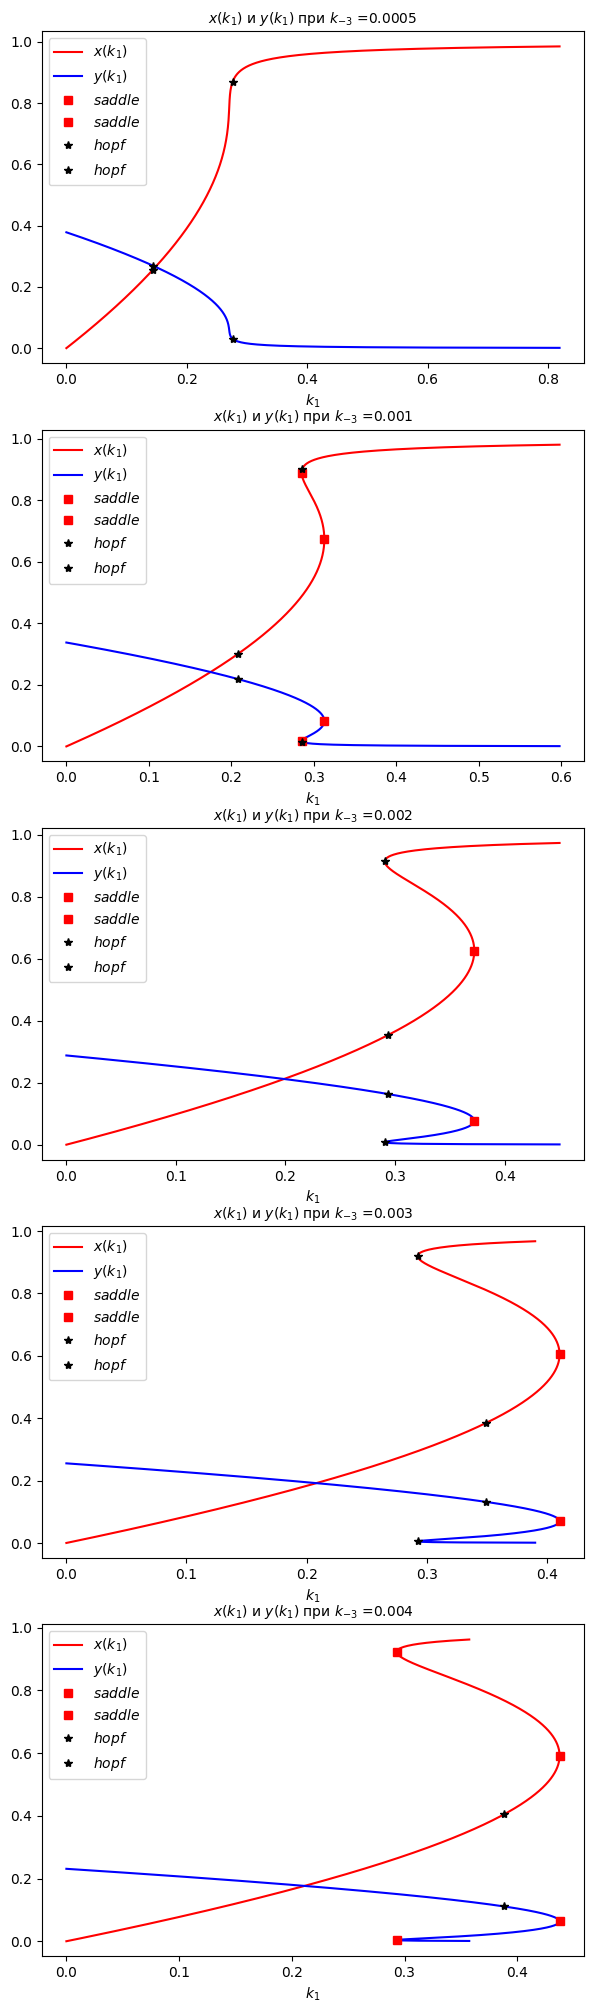

In [13]:
# Инициализация параметров
k1m_val = 0.01 
k2val = 2.5
k3m_vals = [0.0005, 0.001, 0.002, 0.003, 0.004]
k3val = 0.0032


#Независимая переменная
y_k = np.linspace(0.001, 0.5, 10000) #при 0 решение не определено

# Построение графиков
plt.figure(figsize=(7, 25))
plt.rc('axes', titlesize= 10)

for j in range(len(k3m_vals)):
    # Стационарное решение 
    x_val = x_func0(y_k, k3val, k3m_vals[j])
    k1_val = k1_func0(y_k, k1m_val, k2val, k3val, k3m_vals[j])

    # Рассматриваем на заданной фазовой плоскости
    x_val, y_permis, k1_val = zip(*[(x, y, z) for x, y, z in zip(x_val, y_k, k1_val) if 0 <= x <= 1])
    
    # Определение k1, при которых есть бифуркация и ее тип
    k1_bif, y_bif, x_bif, markers = get_bif_type(x_val, y_permis, k1_val, k1m_val, k2val, k3val, k3m_vals[j])

    # Построение графиков x0, y0
    plt.subplot(5, 1, j + 1)
    plt.plot(k1_val, x_val, color = 'red', label='$x(k_1)$')
    plt.plot(k1_val, y_permis, color = 'blue', label='$y(k_1)$')

    
    # Нанесение седловых точек
    k1_s = [k1_bif[i] for i in range(len(k1_bif)) if markers[i] == 1]
    y_s = [y_bif[i] for i in range(len(y_bif)) if markers[i] == 1]
    x_s = [x_bif[i] for i in range(len(x_bif)) if markers[i] == 1]
    plt.plot(k1_s, y_s, 'rs', label='saddle')
    plt.plot(k1_s, x_s, 'rs', label='saddle')
    


    # Нанесение точек Хопфа
    k1_s = [k1_bif[i] for i in range(len(k1_bif)) if markers[i] == 2]
    y_s = [y_bif[i] for i in range(len(y_bif)) if markers[i] == 2]
    x_s = [x_bif[i] for i in range(len(x_bif)) if markers[i] == 2]
    plt.plot(k1_s, y_s, 'k*', label='hopf')
    plt.plot(k1_s, x_s, 'k*', label='hopf')
    
    # Оформление графиков
    plt.title('$x(k_1)$ и $y(k_1)$ при $k_{-3}$ =' + str(k3m_vals[j]))
    plt.xlabel('$k_1$')
    plt.legend(['$x(k_1)$', '$y(k_1)$', '$saddle$', '$saddle$', '$hopf$', '$hopf$'])

plt.show()

<h4>Интервалы устойчивости стационарного решения

Для определения интервалов устойчивости стационарного решения $x(k_1), y(k_1)$ необходимо определить, при каких значениях параметра $k_1$ происходит смена знака в собственных значения матрицы Якоби:  
<div style="text-align: center">

$\lambda_i < 0, Re(\lambda_i) < 0, i=1..n \Longrightarrow \exists \lambda_i: Re(\lambda_i) > 0$  

</div>

In [14]:
eigenA = A.eigenvals()
eigenA_func = lambdify((x, y, k1, k1m, k2, k3, k3m), eigenA)

In [15]:
# Определение точек смены устойчивости решения
def get_stable_marks(x, y, k1_vals, k1m_val, k2val, k3val, k3m_val):
    markers = []

    # С. зн
    eigenA_vals = [eigenA_func(x[i], y[i], k1_vals[i], k1m_val, k2val, k3val, k3m_val) for i in range(len(x))]

    #Определим устойчивость 1/не устойчивость 0
    for i in range(len(y)):
        markers.append(all(complex(eigenval).real < 0 for eigenval in eigenA_vals[i]))
    return markers

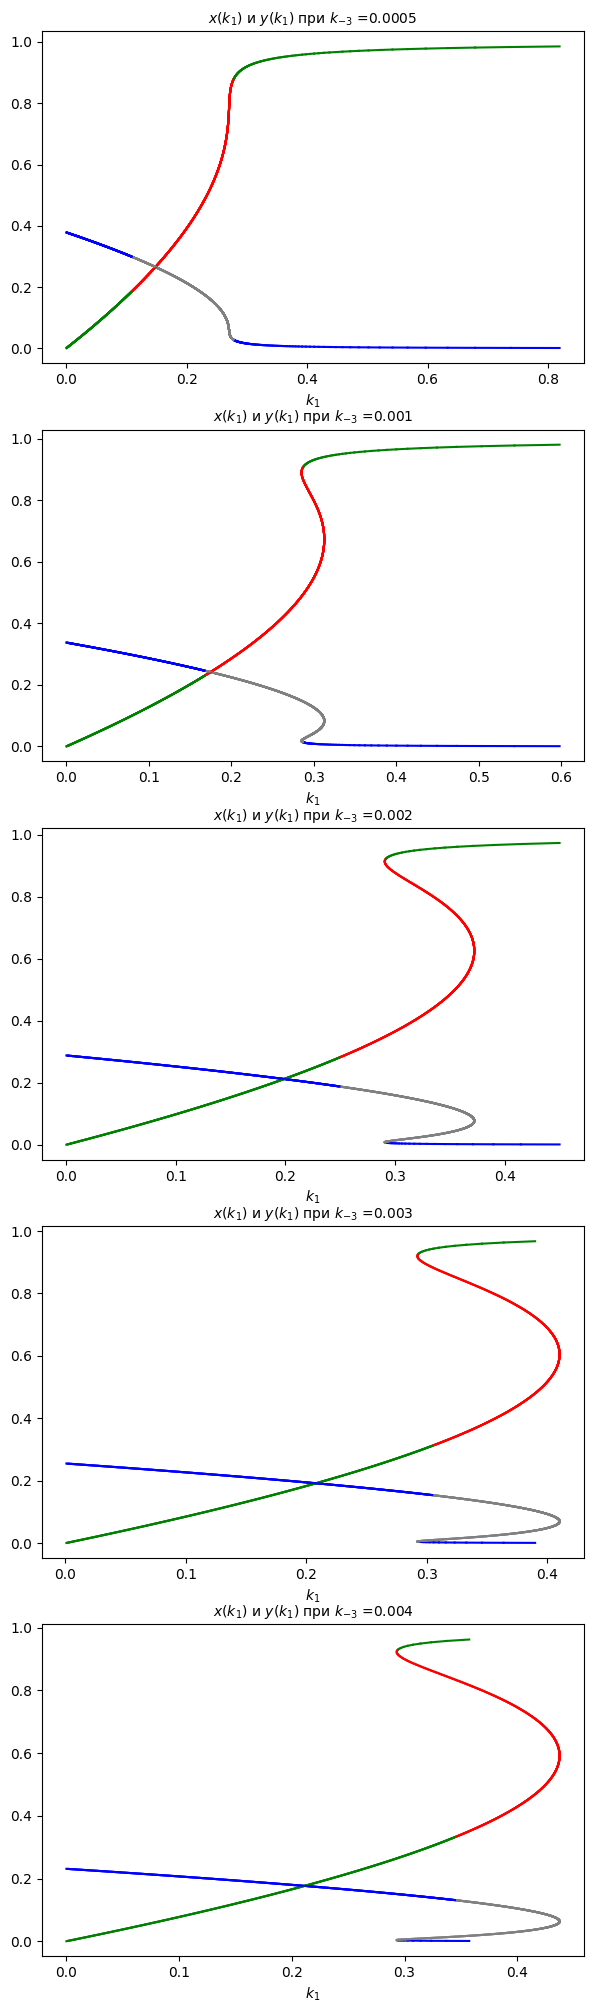

In [46]:
# Инициализация параметров
k1m_val = 0.01 
k2val = 2.5
k3m_vals = [0.0005, 0.001, 0.002, 0.003, 0.004]
k3val = 0.0032

#Независимая переменная
y_k = np.linspace(0.001, 0.5, 2000) #при 0 решение не определено

# Построение графиков
plt.figure(figsize=(7, 25))
plt.rc('axes', titlesize= 10)

for j in range(len(k3m_vals)):
    # Стационарное решение 
    x_val = x_func0(y_k, k3val, k3m_vals[j])
    k1_val = k1_func0(y_k, k1m_val, k2val, k3val, k3m_vals[j])

    # Рассматриваем на заданной фазовой плоскости
    x_val, y_permis, k1_val = zip(*[(x, y, z) for x, y, z in zip(x_val, y_k, k1_val) if 0 <= x <= 1])
    
    # Определение отрезков устойчивости
    markers = get_stable_marks(x_val, y_permis, k1_val, k1m_val, k2val, k3val, k3m_vals[j])

    # Построение графиков x(k1), y(k1)
    plt.subplot(len(k3m_vals), 1, j + 1)

    for i in range(len(x_val) - 1):
        x_start = x_val[i]
        x_end = x_val[i + 1]
        y_start = y_permis[i]
        y_end = y_permis[i + 1]
        k1_start = k1_val[i]
        k1_end = k1_val[i + 1]
        stability = markers[i]
        
        color_x = 'green' if stability == True else 'red'
        plt.plot([k1_start, k1_end], [x_start, x_end], color=color_x)

        color_y = 'blue' if stability == True else 'grey'
        plt.plot([k1_start, k1_end], [y_start, y_end], color=color_y)

    plt.title('$x(k_1)$ и $y(k_1)$ при $k_{-3}$ =' + str(k3m_vals[j]))
    plt.xlabel('$k_1$')

plt.show()

На рисунках приведены графики зависимостей стационарного решения $x(k_1), y(k_1)$ с отмеченными интервалами устойчивости/неустойчивости:  
    - *зеленым* цветом обозначены участки **устойчивости** решения $x(k_1)$  
    - *красным* цветом обозначены участки **неустойчивости** решения $x(k_1)$  
    - *синим* цветом обозначены участки **устойчивости** решения $y(k_1)$  
    - *серым* цветом обозначены участки **неустойчивости** решения $y(k_1)$

<h4>Решение системы

Поиск области автоколебаний решения системы ОДУ сводится к анализу поведения решения вокруг точек бифуркации Андронова-Хопфа.

Text(0, 0.5, '$y$')

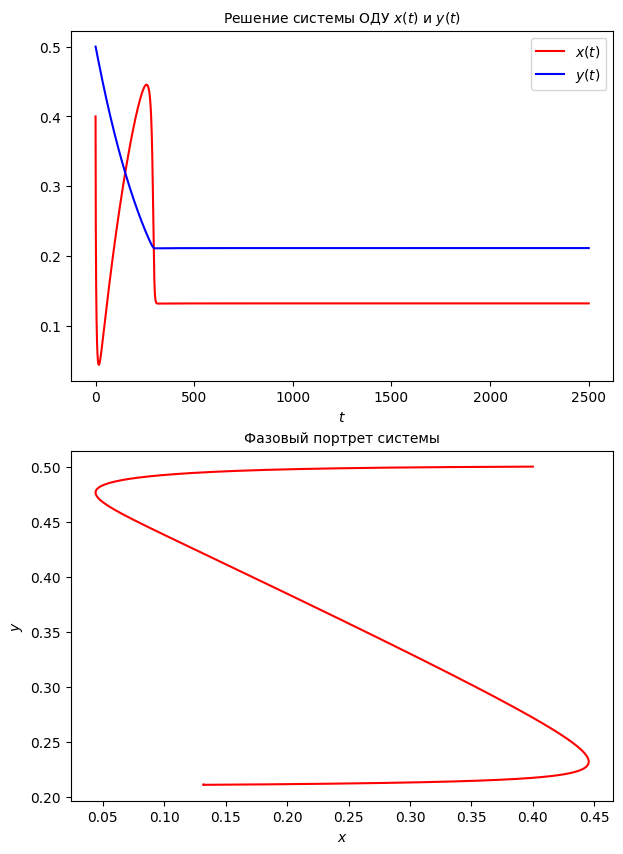

In [44]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Инициализация параметров
k1val = 0.15#0.27#0.27
k1m_val = 0.01
k2val = 2.5
k3m_val = 0.003#0.003
k3val = 0.0032


# Функция правых частей
def eval_equation(y, t):
    z = 1 - y[0] - 2 * y[1]
    eq1 = k1val * z - k1m_val * y[0] - k2val * (z**2) * y[0]
    eq2 = k3val * z**2 - k3m_val * y[1]
    return [eq1, eq2]


t = np.linspace(0, 2500, 100000)
res = odeint(eval_equation, [0.4, 0.5], t)

resX = res[:, 0]
resY = res[:, 1]

plt.figure(figsize=(7, 10))
plt.rc('axes', titlesize= 10)

plt.subplot(2, 1, 1)
plt.plot(t, resX, color = 'red', label='$x(t)$')
plt.plot(t, resY, color = 'blue', label='$y(t)$')
plt.title('Решение системы ОДУ $x(t)$ и $y(t)$')
plt.xlabel('$t$')
plt.legend(['$x(t)$', '$y(t)$'])

plt.subplot(2, 1, 2)
plt.plot(resX, resY, color = 'red', label='$y(x)$')
plt.title('Фазовый портрет системы')
plt.xlabel('$x$')
plt.ylabel('$y$')


<h4> Двухпараметрический анализ

Построение линий кратности и нейтральности для стационарного решения, зависящего от двух параметров: $x_c(k1, k2), y_c(k1, k2)$.

In [18]:
# Определение символьных выражений
z = 1 - x - 2*y
f1 = k1 * z  - k1m * x - k2 * z**2 * x
f2 = k3 * z**2 - k3m * y

F = Matrix([f1, f2])
A = F.jacobian([x, y])
detA = A.det()
traceA = A.trace()

In [19]:
# Решение detA(y, k2) = 0 при x = xc, k1 = k1c
sol_k2 = solve(detA.subs({x: x_sol0, k1: k1_sol0}), k2) 
sol_k2_func = lambdify((y, k1m, k3, k3m), sol_k2[0])

# Решение traceA(y, k2) = 0 при x = xc, k1 = k1c
sol_k2_tr = solve(traceA.subs({x: x_sol0, k1: k1_sol0}), k2) 
sol_k2_func_tr = lambdify((y, k1m, k3, k3m), sol_k2_tr[0])

In [20]:
sol_k2[0]

k1m*k3**4*sqrt(k3**3*k3m*y)*(-2*y - 1)/(y*(2*k3**4*k3m**2*y - k3**3*k3m*sqrt(k3**3*k3m*y) + 6*(k3**3*k3m*y)**(3/2)))

In [21]:
sol_k1 = k1_sol0.subs({k2: sol_k2[0]})
sol_k1_func = lambdify((y, k1m, k3, k3m), sol_k1)

sol_k1_tr = k1_sol0.subs({k2: sol_k2_tr[0]})
sol_k1_func_tr = lambdify((y, k1m, k3, k3m), sol_k1_tr)


sol_k1

-(k1m*k3**4*k3m*sqrt(k3**3*k3m*y)*(-2*y - 1)/(2*k3**4*k3m**2*y - k3**3*k3m*sqrt(k3**3*k3m*y) + 6*(k3**3*k3m*y)**(3/2)) + k1m*k3)/k3 - sqrt(k3**3*k3m*y)*(2*y - 1)*(k1m*k3**4*k3m*sqrt(k3**3*k3m*y)*(-2*y - 1)/(2*k3**4*k3m**2*y - k3**3*k3m*sqrt(k3**3*k3m*y) + 6*(k3**3*k3m*y)**(3/2)) + k1m*k3)/(k3**2*k3m*y)

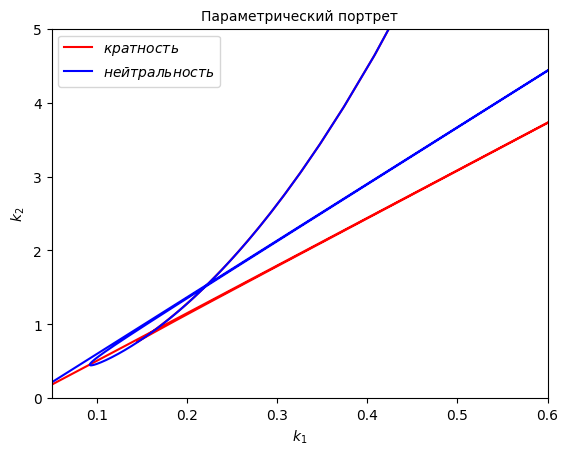

In [37]:
# Инициализация параметров
k1m_val = 0.01
k3val = 0.0032
k3m_val = 0.003


#Независимая переменная в крестности точки седловой бифуркации
y_k = np.linspace(0.0001, 0.5, 1000) #при 0 решение не определено
x_val = [x_func0(y_k[i], k3val, k3m_val) for i in range(len(y_k))]

# Построение линии кратности(detA = 0)
k2_val = [sol_k2_func(y_k[i], k1m_val, k3val, k3m_val) for i in range(len(y_k))]
k1_val = [sol_k1_func(y_k[i], k1m_val, k3val, k3m_val) for i in range(len(y_k))]
x_val, y_permis, k1_val, k2_val = zip(*[(x, y, z, d) for x, y, z, d in zip(x_val, y_k, k1_val, k2_val) if 0 <= x <= 1])
plt.plot(k1_val, k2_val, color = 'red', label='$k_2(k_1)$')


# Построение линии нейтральности(traceA = 0)
k2_val = [sol_k2_func_tr(y_k[i], k1m_val, k3val, k3m_val) for i in range(len(y_k))]
k1_val = [sol_k1_func_tr(y_k[i], k1m_val, k3val, k3m_val) for i in range(len(y_k))]
x_val, y_permis, k1_val, k2_val = zip(*[(x, y, z, d) for x, y, z, d in zip(x_val, y_k, k1_val, k2_val) if 0 <= x <= 1])
plt.plot(k1_val, k2_val, color = 'blue', label='$k_2(k_1)$')

# Оформление графика
plt.title('Параметрический портрет')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.xlim(0.05, 0.6)
plt.ylim(0, 5)
plt.legend(['$кратность$', '$нейтральность$'])


plt.show()
